# **Binary Classifier**

Model for classification of images into two classes - coins and notes

### **Importing necessary libraries**

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_curve, auc
from keras.callbacks import ModelCheckpoint

2024-01-01 08:05:58.395869: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 08:05:58.396001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 08:05:58.640518: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 08:05:59.357445: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 08:06:06.282034: W tensorflow/compiler/tf2

In [2]:
train_data_dir = 'data/binary'
train_coins_dir = 'coins'
train_notes_dir = 'notes'

In [3]:
BATCH_SIZE = 10
EPOCHS = 10
IMG_HEIGHT, IMG_WIDTH = 170, 320

### **Splitting dataset for training and validation**

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 276 images belonging to 2 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 68 images belonging to 2 classes.


### **Checkpoints**

In [7]:
checkpoint_path = "checkpoints/binary-classifier.h5"

In [8]:
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

### **CNN**

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2024-01-01 08:12:07.507991: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-01 08:12:09.200916: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-01 08:12:09.201552: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 168, 318, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 159, 16)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 157, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 78, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 76, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 38, 64)        0

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Training model**

In [12]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)

Epoch 1/10


2024-01-01 08:12:18.717181: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-01 08:12:24.120855: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fec4d2a3640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-01 08:12:24.120919: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-01-01 08:12:24.254966: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1704076944.664910    6547 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 0.8434 - accuracy: 0.7899
Epoch 1: val_accuracy improved from -inf to 0.94118, saving model to checkpoints/binary-classifier.h5


/home/hrishi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 25s 528ms/step - loss: 0.8434 - accuracy: 0.7899 - val_loss: 0.3033 - val_accuracy: 0.9412
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9928
Epoch 2: val_accuracy improved from 0.94118 to 0.97059, saving model to checkpoints/binary-classifier.h5
28/28 [==============================] - 14s 504ms/step - loss: 0.0424 - accuracy: 0.9928 - val_loss: 0.0748 - val_accuracy: 0.9706
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 0.0535 - accuracy: 0.9891
Epoch 3: val_accuracy did not improve from 0.97059
28/28 [==============================] - 11s 376ms/step - loss: 0.0535 - accuracy: 0.9891 - val_loss: 0.2493 - val_accuracy: 0.9559
Epoch 4/10
28/28 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9964
Epoch 4: val_accuracy improved from 0.97059 to 1.00000, saving model to checkpoints/binary-classifier.h5
28/28 [==============================] - 13s 477ms/step - los

In [13]:
eval_result = model.evaluate(validation_generator)

7/7 [==============================] - 2s 292ms/step - loss: 4.4310e-04 - accuracy: 1.0000


In [14]:
test_accuracy = str(eval_result[1] * 100) + "%"
average_accuracy = str(100 * sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])) + "%"

In [15]:
model.evaluate(validation_generator)

7/7 [==============================] - 2s 273ms/step - loss: 4.4310e-04 - accuracy: 1.0000


[0.0004430967674124986, 1.0]

### **Saving trained model**

In [16]:
model.save("saved-models/binary-classifier.h5")

### **Model metrics and visualization**

#### **Accuracy**

In [17]:
print("Test Accuracy:", test_accuracy)
print("Average Validation Accuracy:", average_accuracy)

Test Accuracy: 100.0%
Average Validation Accuracy: 98.23529362678528%


#### **Confusion Matrix**

In [18]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [19]:
y_pred_probs = model.predict(validation_generator)
y_pred = np.round(y_pred_probs).flatten()
y_true = validation_generator.classes

7/7 [==============================] - 2s 300ms/step


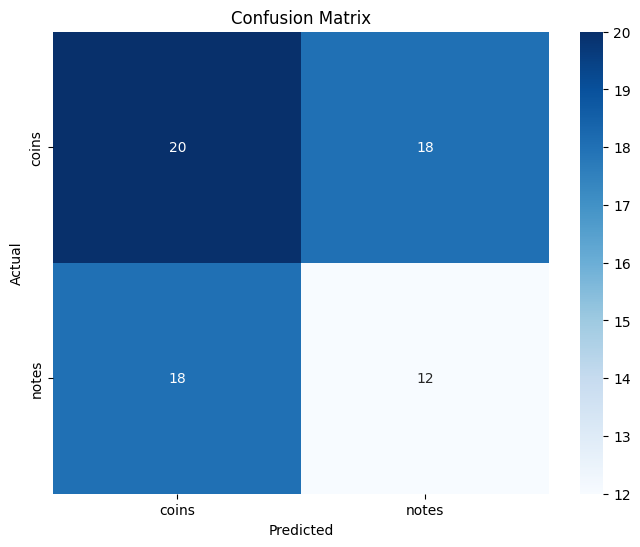

In [20]:
class_names = ['coins', 'notes']
plot_confusion_matrix(y_true, y_pred, class_names)

#### **F1 Score**

In [21]:
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

F1 Score: 0.4000000000000001


#### **Classification Report**

In [22]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

       coins       0.53      0.53      0.53        38
       notes       0.40      0.40      0.40        30

    accuracy                           0.47        68
   macro avg       0.46      0.46      0.46        68
weighted avg       0.47      0.47      0.47        68



#### **Loss and Accuracy graphs**

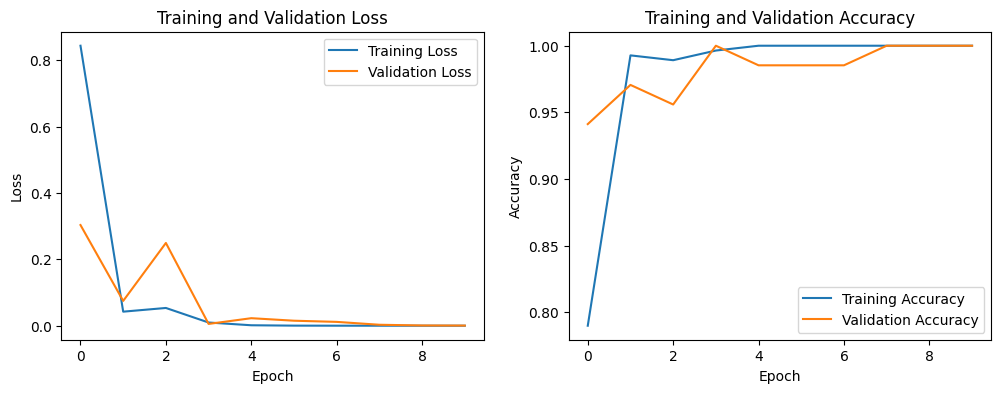

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

#### **ROC Curve**

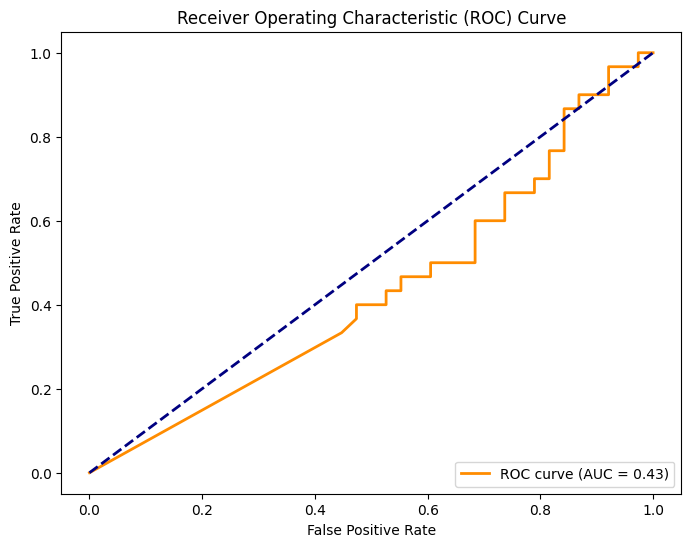

In [24]:
y_true = validation_generator.classes

fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()